In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns; sns.set(style="ticks", color_codes=True)
import geopandas as gpd
from geopandas import GeoDataFrame
import json
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
import math
import plotly.express as px
from tqdm import tqdm
from urllib3.util.retry import Retry
from requests.adapters import HTTPAdapter

We noticed that after extracting the data from the website, ther has been extra characters in the birthplaces. Therefore, before converting the json to csv, we clean the data.

In [2]:
import json
with open('players_birthplace.json') as f:
    data = json.load(f)
#data

In [ ]:
years = list(range(2002,2024))

In [13]:
for year in years:
    try:
        for i in  data[str(year)]:
            if '\n(India)\n' in i['birthplace']:#[1:-9]
                i['birthplace'] = i['birthplace'][1:-9]
    except:
        pass

In [33]:
with open('players_birthplace_refined.json', "w") as json_file:
    json.dump(data, json_file, indent=4)

# Plot the map

In [3]:
import pandas as pd
df = pd.read_excel('Football Data Final_Corrected.xlsx', sheet_name='Final Data')
df

,Year,Name,Birth Place,State
0,2002,Rajat Ghosh Dastidar,Kolkata,WEST BENGAL
1,2002,Sangram Mukherjee,Kolkata,WEST BENGAL
2,2002,Mahesh Gawli,Panzorconi,GOA
3,2002,Deepak Kumar Mondal,Noamundi,WEST BENGAL
4,2002,Samir Subash Naik,Mumbai,MAHARASHTRA
...,...,...,...,...
624,2023,Nandhakumar Sekar,Chennai,TAMIL NADU
625,2023,Manvir Singh,Duhre,PUNJAB
626,2023,Bipin Singh,Manipur,MANIPUR
627,2023,Rahim Ali,Barrackpore,WEST BENGAL


In [4]:
df['State'].unique()

array(['WEST BENGAL', 'GOA', 'MAHARASHTRA', 'BIHAR', 'JAMMU AND KASHMIR',
       'MANIPUR', 'KARNATAKA', 'KERALA', 'SIKKIM', 'UTTAR PRADESH',
       'UTTARAKHAND', 'PUNJAB', 'MEGHALAYA', 'MIZORAM', 'ANDHRA PRADESH',
       'CHANDIGARH', 'TAMIL NADU', 'ASSAM', 'HIMACHAL PRADESH', 'HARYANA',
       'DELHI\t\t ', 'JHARKHAND', nan, 'TELANGANA', 'DELHI'], dtype=object)

In [5]:
df = df.dropna()
df['State'].unique()

array(['WEST BENGAL', 'GOA', 'MAHARASHTRA', 'BIHAR', 'JAMMU AND KASHMIR',
       'MANIPUR', 'KARNATAKA', 'KERALA', 'SIKKIM', 'UTTAR PRADESH',
       'UTTARAKHAND', 'PUNJAB', 'MEGHALAYA', 'MIZORAM', 'ANDHRA PRADESH',
       'CHANDIGARH', 'TAMIL NADU', 'ASSAM', 'HIMACHAL PRADESH', 'HARYANA',
       'DELHI\t\t ', 'JHARKHAND', 'TELANGANA', 'DELHI'], dtype=object)

We need to create three maps. 2002-2013, 2014-2019 and 2021-2023.

For this we need to extract the relevant subset of the data and remove the duplicates. 

In [6]:
set_1 = list(range(2002, 2014))
set_2 = list(range(2014, 2020))
set_3 = list(range(2021, 2024))
all_set = set_1+set_2+set_3

Count the number of duplicates

In [7]:
num_duplicates = df.duplicated().sum()
num_duplicates

0

In [8]:
df_set1 = df[df['Year'].isin(set_1)].reset_index(drop=True)
df_set2 = df[df['Year'].isin(set_2)].reset_index(drop=True)
df_set3 = df[df['Year'].isin(set_3)].reset_index(drop=True)

df_set1 = df_set1.drop_duplicates()
df_set2 = df_set2.drop_duplicates()
df_set3 = df_set3.drop_duplicates()

## Set 1 (2002-2013)
### Cumulative number of players in set 1.

In [9]:
df_set1['freq_count'] = df_set1.groupby('State')['State'].transform('count')
# extract the states
df_states_set1 = df_set1[['State','freq_count']].drop_duplicates().reset_index(drop=True)

In [10]:
df_states_set1['State'][20]='DELHI'

/tmp/ipykernel_160096/3622747682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_states_set1['State'][20]='DELHI'


In [17]:
# map path
map_data = gpd.read_file('India Shapefile With Kashmir/India Shape/india_st.shp')
map_data.head()

,STATE,geometry
0,ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9..."
1,ANDHRA PRADESH,"POLYGON ((82.00063 17.95354, 82.11718 18.02457..."
2,ARUNACHAL PRADESH,"POLYGON ((95.61476 27.34745, 95.69234 27.33888..."
3,ASSAM,"POLYGON ((92.82207 25.57781, 92.69672 25.61368..."
4,BIHAR,"POLYGON ((84.16946 26.28322, 83.91399 26.38523..."


<Axes: >

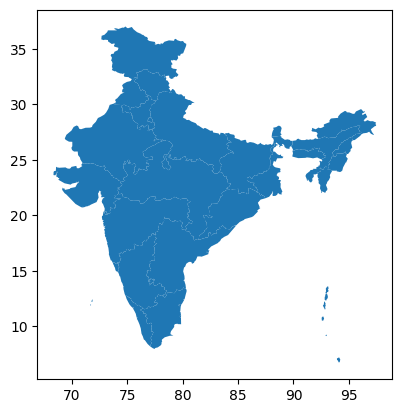

In [12]:
map_data.plot()

In [18]:
other_states = pd.DataFrame([{'State': 'RAJASTHAN', 'freq_count':0},
                {'State': 'ORISSA', 'freq_count':0},
                {'State': 'PONDICHERRY', 'freq_count':0},
                {'State': 'TRIPURA', 'freq_count':0},
                {'State': 'MADHYA PRADESH', 'freq_count':0},
                {'State': 'LAKSHADWEEP', 'freq_count':0},
                {'State': 'GUJARAT', 'freq_count':0},
                {'State': 'DAMAN AND DIU', 'freq_count':0},
                {'State': 'DAMAN AND DIU', 'freq_count':0},
                {'State': 'DADRA AND NAGAR HAVELI', 'freq_count':0},
                {'State': 'ARUNACHAL PRADESH', 'freq_count':0},
                {'State': 'ANDAMAN AND NICOBAR ISLANDS', 'freq_count':0},
                {'State': 'NAGALAND', 'freq_count':0}])

df_states_set1 = pd.concat([df_states_set1, other_states], axis = 0)#.append(other_states, ignore_index=True)
cats=[]
for i in df_states_set1['freq_count']:
    if i==0:
        cat = 'beige'
        cats.append(cat)
    elif 0<i<10:
        cat= 'blueviolet'
        cats.append(cat)
    elif 10<=i<20:
        cat='deepskyblue'
        cats.append(cat)
    elif 20<=i<30:
        cat='goldenrod'
        cats.append(cat)
    elif 30<=i<40:
        cat='lime'
        cats.append(cat)
    elif 40<=i<50:
        cat='palevioletred'
        cats.append(cat)
    #elif 50<i<60:
       # cat='sienna'
        #cats.append(cat)
    else:
        cat='sandybrown'
        cats.append(cat)
print(len(df_states_set1))
print(len(cats))
df_states_set1['category'] = cats
df_states_set1.head()

48
48


,State,freq_count,category
0,WEST BENGAL,67,sandybrown
1,GOA,61,sandybrown
2,MAHARASHTRA,23,goldenrod
3,BIHAR,3,blueviolet
4,JAMMU AND KASHMIR,9,blueviolet


In [19]:
merged = map_data.set_index('STATE').join(df_states_set1.set_index('State'))#.reset_index(level=0, inplace=True)
merged.head()

,geometry,freq_count,category
STATE,,,
ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9...",0,beige
ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9...",0,beige
ANDHRA PRADESH,"POLYGON ((82.00063 17.95354, 82.11718 18.02457...",9,blueviolet
ARUNACHAL PRADESH,"POLYGON ((95.61476 27.34745, 95.69234 27.33888...",0,beige
ARUNACHAL PRADESH,"POLYGON ((95.61476 27.34745, 95.69234 27.33888...",0,beige


/home/debodeep94/anaconda3/envs/env-pytorch/lib/python3.10/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Figure size 3600x2400 with 0 Axes>

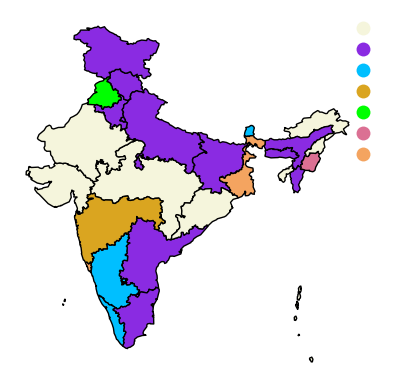

<Figure size 640x480 with 0 Axes>

In [15]:
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(12,8), dpi = 300)
cmap = plt.cm.colors.ListedColormap('pastel1')
#colors = ['lightgrey','cyan', 'red', 'orange', 'yellow','green', 'blue', 'purple']
colors =['beige', 'blueviolet', 'deepskyblue', 'goldenrod', 'lime', 'palevioletred', 'sandybrown']
categories = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70']
# Create a colormap that maps categories to colors
cmap = ListedColormap(colors, name='custom_colormap')
ax=merged.plot(column = 'category', categorical = True, legend = True, cmap=cmap, edgecolor='black')
# Move the legend outside
legend = ax.get_legend()
# Remove legend labels
for text in legend.get_texts():
    text.set_text('')
legend.set_frame_on(False)
legend.set_bbox_to_anchor((1.1, 1))  # Adjust the coordinates as needed
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
ax.set_frame_on(False)
#ax.xticks(None)
#ax.yticks(None)
plt.figure(frameon=False)
plt.savefig('/home/debodeep94/OneDrive/Indian researcher/desidata/football/players_2002_13.png',bbox_inches='tight')
#plt.show()


## Choropleth for set 2


In [20]:
df_set2['freq_count'] = df_set2.groupby('State')['State'].transform('count')
# extract the states
df_states_set2 = df_set2[['State','freq_count']].drop_duplicates().reset_index(drop=True)
df_states_set2.head()

,State,freq_count
0,WEST BENGAL,26
1,PUNJAB,25
2,GOA,22
3,MEGHALAYA,7
4,JHARKHAND,5


In [21]:
map_data = gpd.read_file('/home/debodeep94/OneDrive/Indian researcher/desidata/football/archive/India States/Indian_states.shp')
map_data.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [22]:
map_data['st_nm'] = map_data['st_nm'].str.upper()
#map_data.head()

In [23]:
merged = map_data.set_index('st_nm').join(df_states_set2.set_index('State'))#.reset_index(level=0, inplace=True)
merged.head()

,geometry,freq_count
st_nm,,
ANDAMAN & NICOBAR ISLAND,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN
ARUNANCHAL PRADESH,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",NaN
ASSAM,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",9.0
BIHAR,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",NaN
CHANDIGARH,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",6.0


In [24]:
df_states_set2['State'][7]='NCT OF DELHI'
other_states = pd.DataFrame([{'State': 'RAJASTHAN', 'freq_count':0},
                {'State': 'ODISHA', 'freq_count':0},
                {'State': 'PUDUCHERRY', 'freq_count':0},
                {'State': 'TRIPURA', 'freq_count':0},
                {'State': 'MADHYA PRADESH', 'freq_count':0},
                {'State': 'LAKSHADWEEP', 'freq_count':0},
                {'State': 'GUJARAT', 'freq_count':0},
                {'State': 'DAMAN & DIU', 'freq_count':0},
                {'State': 'CHHATTISGARH', 'freq_count':0},
                {'State': 'DADARA & NAGAR HAVELI', 'freq_count':0},
                {'State': 'ARUNANCHAL PRADESH', 'freq_count':0},
                {'State': 'ANDAMAN & NICOBAR ISLAND', 'freq_count':0},
                {'State': 'NAGALAND', 'freq_count':0},
                {'State': 'ANDHRA PRADESH', 'freq_count':0},
                {'State': 'BIHAR', 'freq_count':0},
                {'State': 'JAMMU & KASHMIR', 'freq_count':0}])

df_states_set2 = pd.concat([df_states_set2, other_states], axis = 0)#.append(other_states, ignore_index=True)
cats=[]
for i in df_states_set2['freq_count']:
    if i==0:
        cat = 'beige'
        cats.append(cat)
    elif 0<i<10:
        cat= 'blueviolet'
        cats.append(cat)
    elif 10<=i<20:
        cat='deepskyblue'
        cats.append(cat)
    elif 20<=i<30:
        cat='palevioletred'
        cats.append(cat)
    else:
        cat='sandybrown'
        cats.append(cat)
print(len(df_states_set2))
print(len(cats))
df_states_set2['category'] = cats
df_states_set2.head()

36
36


/tmp/ipykernel_160096/3604185867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_states_set2['State'][7]='NCT OF DELHI'


,State,freq_count,category
0,WEST BENGAL,26,palevioletred
1,PUNJAB,25,palevioletred
2,GOA,22,palevioletred
3,MEGHALAYA,7,blueviolet
4,JHARKHAND,5,blueviolet


In [25]:
merged = map_data.set_index('st_nm').join(df_states_set2.set_index('State'))#.reset_index(level=0, inplace=True)
merged.head()

,geometry,freq_count,category
st_nm,,,
ANDAMAN & NICOBAR ISLAND,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",0.0,beige
ARUNANCHAL PRADESH,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",0.0,beige
ASSAM,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",9.0,blueviolet
BIHAR,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",0.0,beige
CHANDIGARH,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",6.0,blueviolet


/home/debodeep94/anaconda3/envs/env-pytorch/lib/python3.10/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Figure size 3600x2400 with 0 Axes>

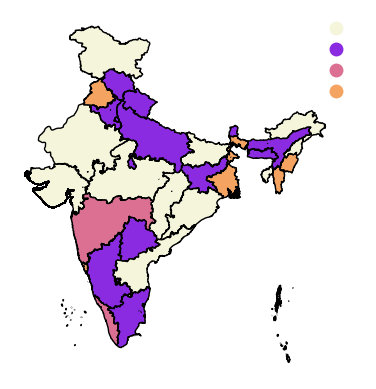

<Figure size 640x480 with 0 Axes>

In [24]:
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(12,8), dpi = 300)
cmap = plt.cm.colors.ListedColormap('pastel1')
#colors = ['lightgrey','cyan', 'red', 'orange', 'yellow','green', 'blue', 'purple']
colors =['beige', 'blueviolet', 'deepskyblue','palevioletred', 'sandybrown']

# Create a colormap that maps categories to colors
cmap = ListedColormap(colors, name='custom_colormap')
ax=merged.plot(column = 'category', categorical = True, legend = True, cmap=cmap, edgecolor='black')
# Move the legend outside
legend = ax.get_legend()
# Remove legend labels
for text in legend.get_texts():
    text.set_text('')
legend.set_frame_on(False)
legend.set_bbox_to_anchor((1.1, 1))  # Adjust the coordinates as needed
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
ax.set_frame_on(False)
#ax.xticks(None)
#ax.yticks(None)
plt.figure(frameon=False)
plt.savefig('/home/debodeep94/OneDrive/Indian researcher/desidata/football/players_2014_19.png',bbox_inches='tight')
#plt.show()


## Choropleth for Set3

In [38]:
df_set3['freq_count'] = df_set3.groupby('State')['State'].transform('count')
# extract the states
df_states_set3 = df_set3[['State','freq_count']].drop_duplicates().reset_index(drop=True)
#df_states_set1['State'][20]='DELHI'
df_states_set3.head()

,State,freq_count
0,PUNJAB,13
1,WEST BENGAL,12
2,MAHARASHTRA,8
3,MANIPUR,18
4,CHANDIGARH,3


In [39]:
map_data = gpd.read_file('/home/debodeep94/OneDrive/Indian researcher/desidata/football/India_State_Shapefile_post_ladakh/India_State_Shapefile/India_State_Boundary.shp')
map_data.head()

,Name,Type,geometry
0,West Bengal,State,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21..."
1,Andaman & Nicobar,Union Territory,"MULTIPOLYGON (((92.90124 12.91071, 92.90157 12..."
2,Chandigarh,Union Territory,"POLYGON ((76.77232 30.79420, 76.77286 30.79343..."
3,Daman and Diu and Dadra and Nagar Haveli,Union Territory,"MULTIPOLYGON (((72.96339 20.33227, 72.96390 20..."
4,Delhi,Union Territory,"POLYGON ((77.10591 28.87005, 77.10668 28.86989..."


In [40]:
map_data['Name'] = map_data['Name'].str.upper()

In [41]:
merged = map_data.set_index('Name').join(df_states_set3.set_index('State'))#.reset_index(level=0, inplace=True)
merged

,Type,geometry,freq_count
Name,,,
WEST BENGAL,State,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",12.0
ANDAMAN & NICOBAR,Union Territory,"MULTIPOLYGON (((92.90124 12.91071, 92.90157 12...",NaN
CHANDIGARH,Union Territory,"POLYGON ((76.77232 30.79420, 76.77286 30.79343...",3.0
DAMAN AND DIU AND DADRA AND NAGAR HAVELI,Union Territory,"MULTIPOLYGON (((72.96339 20.33227, 72.96390 20...",NaN
DELHI,Union Territory,"POLYGON ((77.10591 28.87005, 77.10668 28.86989...",1.0
HARYANA,State,"POLYGON ((76.57526 30.10063, 76.57645 30.10152...",NaN
JHARKHAND,State,"POLYGON ((87.69613 24.16027, 87.69625 24.15974...",NaN
KARNATAKA,State,"MULTIPOLYGON (((77.33232 18.45086, 77.33267 18...",NaN
KERALA,State,"POLYGON ((74.98896 12.79553, 74.98953 12.79554...",10.0


In [42]:
df_states_set3 = df_states_set3.drop(11)
df_states_set3 = df_states_set3.drop(13)
other_states = pd.DataFrame([
                {'State': 'TELENGANA', 'freq_count':0},
                {'State': 'ODISHA', 'freq_count':0},
                {'State': 'PUDUCHERRY', 'freq_count':0},
                {'State': 'TRIPURA', 'freq_count':0},
                {'State': 'MADHYA PRADESH', 'freq_count':0},
                {'State': 'LAKSHADWEEP', 'freq_count':0},
                {'State': 'GUJARAT', 'freq_count':0},
                {'State': 'DAMAN AND DIU AND DADRA AND NAGAR HAVELI', 'freq_count':0},
                {'State': 'ARUNACHAL PRADESH', 'freq_count':0},
                {'State': 'ANDAMAN & NICOBAR', 'freq_count':0},
                {'State': 'NAGALAND', 'freq_count':0},
                {'State': 'ANDHRA PRADESH', 'freq_count':0},
                {'State': 'BIHAR', 'freq_count':0},
                {'State': 'LADAKH', 'freq_count':0},
                {'State': 'DELHI', 'freq_count':4},
                {'State': 'KARNATAKA', 'freq_count':0},
                {'State': 'HARYANA', 'freq_count':0},
                {'State': 'MEGHALAYA', 'freq_count':0},
                {'State': 'SIKKIM', 'freq_count':0},
                {'State': 'RAJASTHAN', 'freq_count':0},
                {'State': 'UTTARAKHAND', 'freq_count':0},
                {'State': 'CHHATTISHGARH', 'freq_count':0},
                {'State': 'TAMILNADU', 'freq_count':0},
                {'State': 'JHARKHAND', 'freq_count':0}
                ])

df_states_set3 = pd.concat([df_states_set3, other_states], axis = 0)#.append(other_states, ignore_index=True)
cats=[]
for i in df_states_set3['freq_count']:
    if i==0:
        cat = 'beige'
        cats.append(cat)
    elif 0<i<5:
        cat= 'blueviolet'
        cats.append(cat)
    elif 5<=i<10:
        cat='deepskyblue'
        cats.append(cat)
    elif 10<=i<15:
        cat='palevioletred'
        cats.append(cat)
    else:
        cat='sandybrown'
        cats.append(cat)
print(len(df_states_set2))
print(len(cats))
df_states_set3['category'] = cats
df_states_set3

36
38


,State,freq_count,category
0,PUNJAB,13,palevioletred
1,WEST BENGAL,12,palevioletred
2,MAHARASHTRA,8,deepskyblue
3,MANIPUR,18,sandybrown
4,CHANDIGARH,3,blueviolet
5,UTTAR PRADESH,3,blueviolet
6,GOA,14,palevioletred
7,MIZORAM,5,deepskyblue
8,HIMACHAL PRADESH,3,blueviolet
9,KERALA,10,palevioletred


In [45]:
merged = map_data.set_index('Name').join(df_states_set3.set_index('State'))#.reset_index(level=0, inplace=True)
merged.head()

,Type,geometry,freq_count,category
Name,,,,
WEST BENGAL,State,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",12,palevioletred
ANDAMAN & NICOBAR,Union Territory,"MULTIPOLYGON (((92.90124 12.91071, 92.90157 12...",0,beige
CHANDIGARH,Union Territory,"POLYGON ((76.77232 30.79420, 76.77286 30.79343...",3,blueviolet
DAMAN AND DIU AND DADRA AND NAGAR HAVELI,Union Territory,"MULTIPOLYGON (((72.96339 20.33227, 72.96390 20...",0,beige
DELHI,Union Territory,"POLYGON ((77.10591 28.87005, 77.10668 28.86989...",4,blueviolet


/home/debodeep94/anaconda3/envs/env-pytorch/lib/python3.10/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Figure size 3600x2400 with 0 Axes>

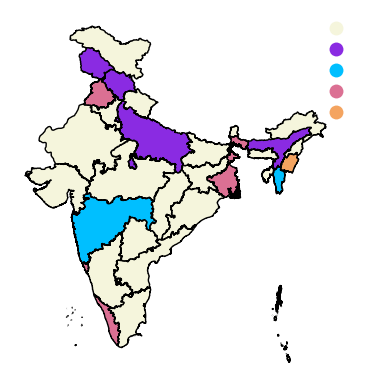

<Figure size 640x480 with 0 Axes>

In [44]:
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(12,8), dpi = 300)
cmap = plt.cm.colors.ListedColormap('pastel1')
#colors = ['lightgrey','cyan', 'red', 'orange', 'yellow','green', 'blue', 'purple']
colors =['beige', 'blueviolet', 'deepskyblue','palevioletred', 'sandybrown']#, 'sandybrown']

# Create a colormap that maps categories to colors
cmap = ListedColormap(colors, name='custom_colormap')
ax=merged.plot(column = 'category', categorical = True, legend = True, cmap=cmap, edgecolor='black')
# Move the legend outside
legend = ax.get_legend()
# Remove legend labels
for text in legend.get_texts():
    text.set_text('')
legend.set_frame_on(False)
legend.set_bbox_to_anchor((1.1, 1))  # Adjust the coordinates as needed
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
ax.set_frame_on(False)
#ax.xticks(None)
#ax.yticks(None)
plt.figure(frameon=False)
plt.savefig('/home/debodeep94/OneDrive/Indian researcher/desidata/football/players_2014_19.png',bbox_inches='tight')
#plt.show()
